# Introduction

This notebook begins the exploratory analysis for the competition dataset derived from a deep learning model trained on the Simulated Roads Accident dataset. We’ll inspect basic feature distributions, compare them against the original dataset where relevant, and note any shifts or anomalies that could impact model performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# set dataframe display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Load the dataset

In [2]:
data = pd.read_csv('../data/processed/train.csv')

print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

display(data.head())
print(data.info())

Dataset has 517754 rows and 14 columns.


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.0600,35,daylight,rainy,False,True,afternoon,False,True,1,0.1300
1,1,urban,4,0.9900,35,daylight,clear,True,False,evening,True,True,0,0.3500
2,2,rural,4,0.6300,70,dim,clear,False,True,morning,True,False,2,0.3000
3,3,highway,4,0.0700,35,dim,rainy,True,True,morning,False,False,1,0.2100
4,4,rural,1,0.5800,60,daylight,foggy,False,False,evening,True,False,1,0.5600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [3]:
# set data types for the columns

# set bool columns to int
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  int64  
 8   public_road             517754 non-null  int64  
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  int64  
 11  school_season           517754 non-null  int64  
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: float64(2), int64

In [4]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

print(f"Numerical columns: {num_cols.tolist()}")
print(f"Categorical columns: {cat_cols.tolist()}")

Numerical columns: ['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present', 'public_road', 'holiday', 'school_season', 'num_reported_accidents', 'accident_risk']
Categorical columns: ['road_type', 'lighting', 'weather', 'time_of_day']


# Descriptive statistics

In [5]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,517754.0000,258876.5000,149462.8500,0.0000,129438.2500,258876.5000,388314.7500,517753.0000
num_lanes,517754.0000,2.4915,1.1204,1.0000,1.0000,2.0000,3.0000,4.0000
curvature,517754.0000,0.4887,0.2726,0.0000,0.2600,0.5100,0.7100,1.0000
speed_limit,517754.0000,46.1126,15.7885,25.0000,35.0000,45.0000,60.0000,70.0000
road_signs_present,517754.0000,0.4992,0.5000,0.0000,0.0000,0.0000,1.0000,1.0000
public_road,517754.0000,0.5023,0.5000,0.0000,0.0000,1.0000,1.0000,1.0000
holiday,517754.0000,0.5035,0.5000,0.0000,0.0000,1.0000,1.0000,1.0000
school_season,517754.0000,0.4975,0.5000,0.0000,0.0000,0.0000,1.0000,1.0000
num_reported_accidents,517754.0000,1.1880,0.8960,0.0000,1.0000,1.0000,2.0000,7.0000
accident_risk,517754.0000,0.3524,0.1664,0.0000,0.2300,0.3400,0.4600,1.0000


In [6]:
data[cat_cols].describe().T

,count,unique,top,freq
road_type,517754,3,highway,173672
lighting,517754,3,dim,183826
weather,517754,3,foggy,181463
time_of_day,517754,3,morning,173410


# Distribution check on Target Variable

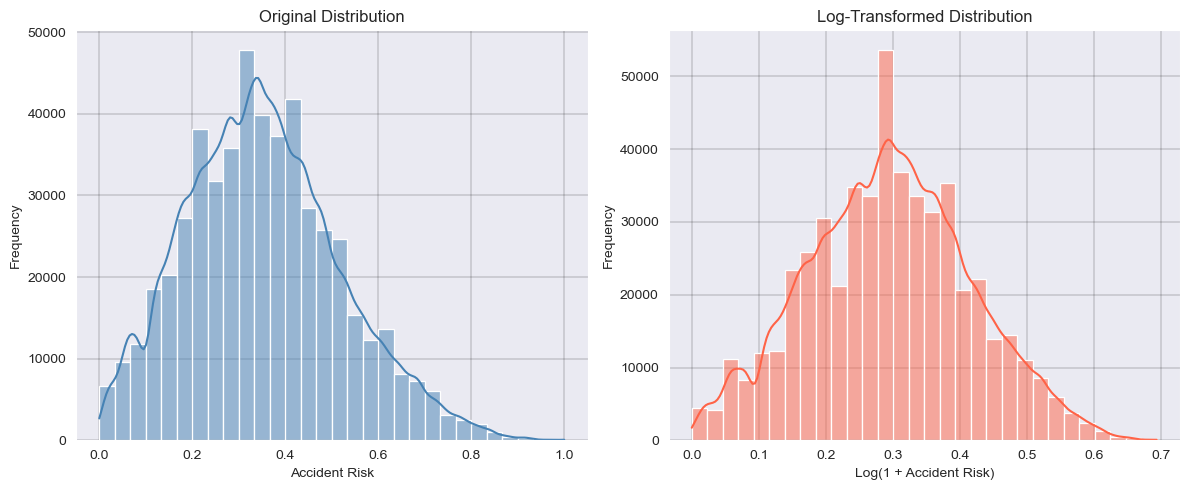

In [7]:
df_plot = data[['accident_risk']].copy()
df_plot['risk_log'] = np.log1p(df_plot['accident_risk'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Distribution
sns.histplot(df_plot['accident_risk'], bins=30, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Accident Risk')
axes[0].set_ylabel('Frequency')
axes[0].grid(color='k', linestyle='-', linewidth=0.3, alpha=0.6)

# Log-Transformed
sns.histplot(df_plot['risk_log'], bins=30, kde=True, ax=axes[1], color="tomato")
axes[1].set_title('Log-Transformed Distribution')
axes[1].set_xlabel('Log(1 + Accident Risk)')
axes[1].set_ylabel('Frequency')
axes[1].grid(color='k', linestyle='-', linewidth=0.3, alpha=0.6)

plt.tight_layout()
plt.show()

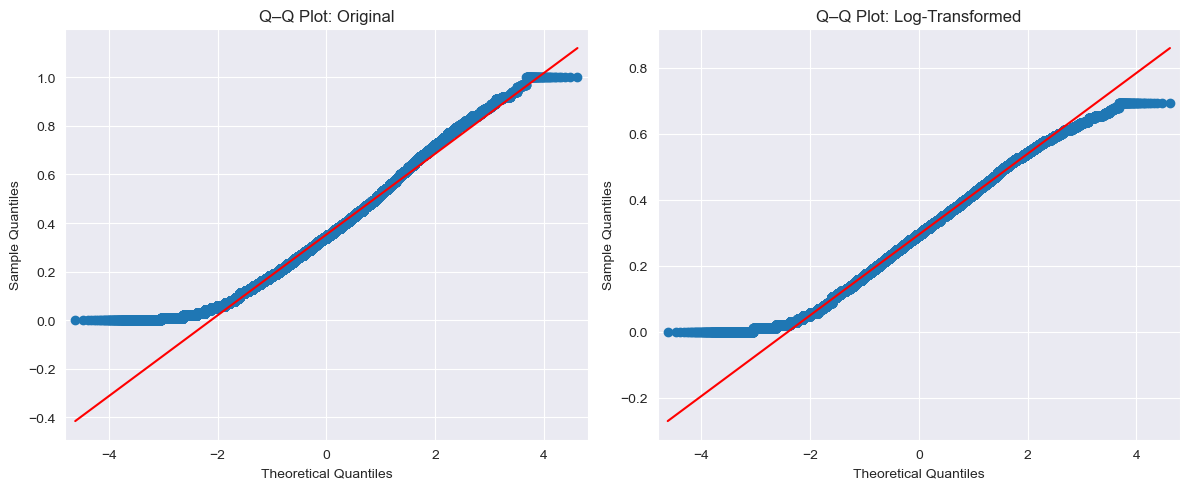

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sm.qqplot(df_plot['accident_risk'], line='s', ax=axes[0])
axes[0].set_title("Q–Q Plot: Original")

sm.qqplot(df_plot['risk_log'], line='s', ax=axes[1])
axes[1].set_title("Q–Q Plot: Log-Transformed")

plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import skew

print("Skewness (original):", skew(df_plot['accident_risk']))
print("Skewness (log-transformed):", skew(df_plot['risk_log']))

Skewness (original): 0.37841688001579904
Skewness (log-transformed): 0.06480488370111474


<font size="5">Insights</font>

The target variable displays an almost symmetrical, bell-shaped distribution, indicating that values are fairly balanced around the mean. The slight skewness observed is minimal, suggesting the data is close to normally distributed and well-behaved for modeling.

# Outlier check

In [10]:
import numpy as np
from scipy import stats


z_scores = np.abs(stats.zscore(data['accident_risk'], nan_policy='omit'))

threshold = 3

outliers = z_scores > threshold

print(f"Number of outliers in 'accident_risk': {outliers.sum()}")
outlier_rows = data[outliers]
outlier_rows.head()

Number of outliers in 'accident_risk': 1163


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
315,315,highway,4,0.7300,60,night,rainy,0,1,evening,1,0,3,0.9200
708,708,urban,1,0.6600,60,night,foggy,0,0,morning,1,1,4,0.8800
756,756,urban,3,0.6800,60,night,foggy,0,1,afternoon,0,1,3,0.8700
956,956,rural,3,0.7900,60,night,rainy,0,1,evening,0,1,1,0.8600
1325,1325,rural,2,0.9500,60,night,foggy,0,0,morning,0,0,3,0.8700


# Correlation Analysis

## Numerical columns correlations

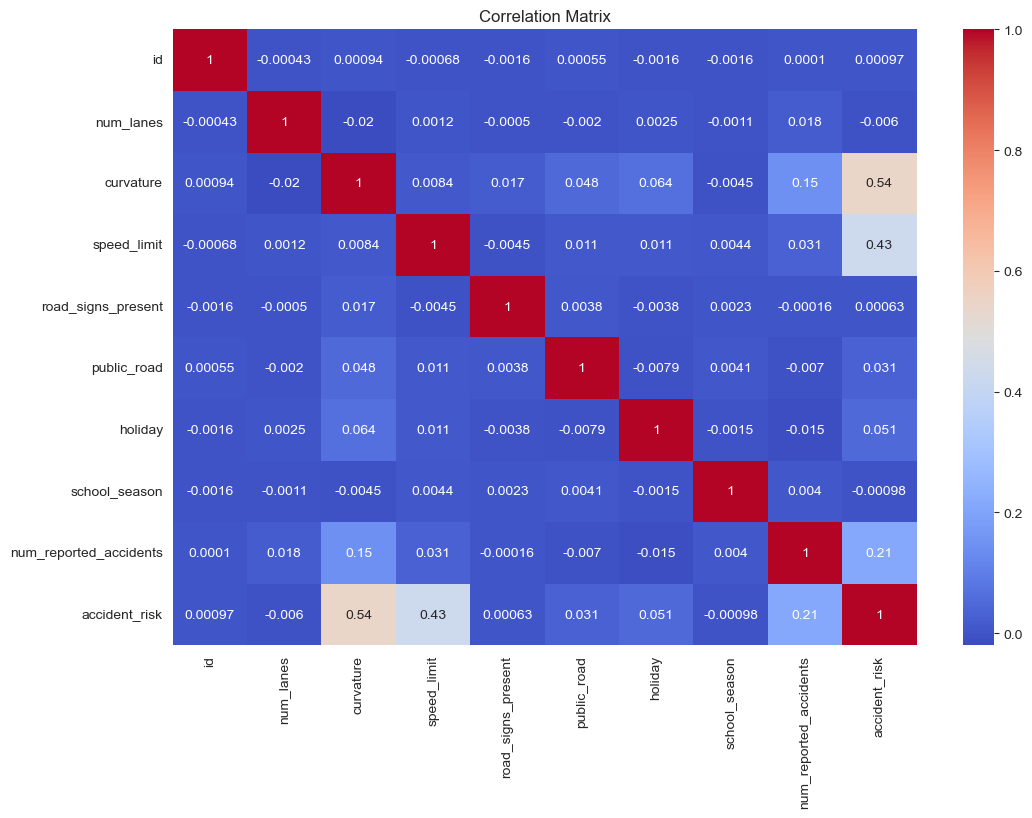

In [11]:
corr = data[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Categorical column correlations

In [12]:
from scipy.stats import f_oneway

for col in cat_cols:
    unique_values = data[col].unique()

    if len(unique_values) < 2:
        continue

    groups = []

    for val in unique_values:
        group = data[data[col] == val]['accident_risk']
        groups.append(group)

    f_stat, p_val = f_oneway(*groups)

    # Print results
    print(f"ANOVA results for '{col}' vs 'accident_risk'")
    print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}\n")

ANOVA results for 'road_type' vs 'accident_risk'
F-statistic: 119.422, p-value: 0.0000

ANOVA results for 'lighting' vs 'accident_risk'
F-statistic: 71752.063, p-value: 0.0000

ANOVA results for 'weather' vs 'accident_risk'
F-statistic: 10189.449, p-value: 0.0000

ANOVA results for 'time_of_day' vs 'accident_risk'
F-statistic: 26.389, p-value: 0.0000



# Light conditions vs Accident Risk

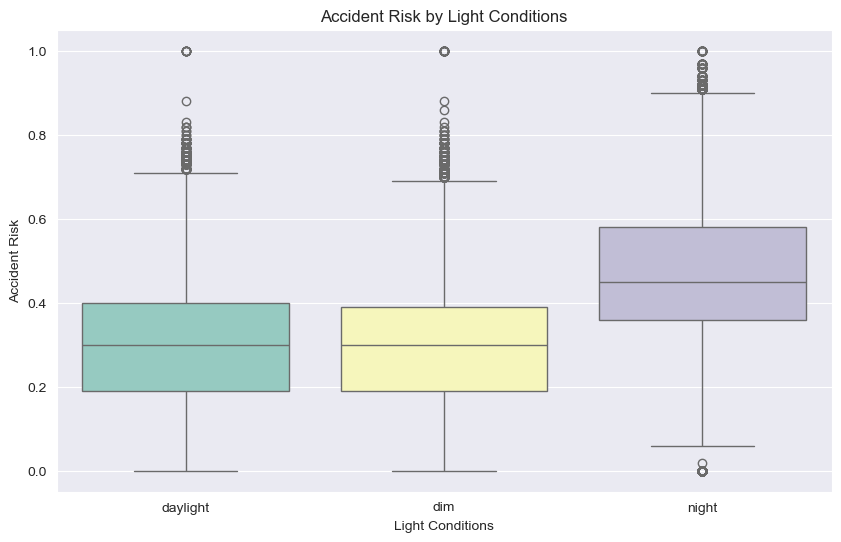

In [13]:
df_plot = data[['lighting', 'accident_risk']].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='lighting', y='accident_risk', data=df_plot, palette="Set3")
plt.title('Accident Risk by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Accident Risk')
plt.show()

# Weather conditions vs Accident Risks

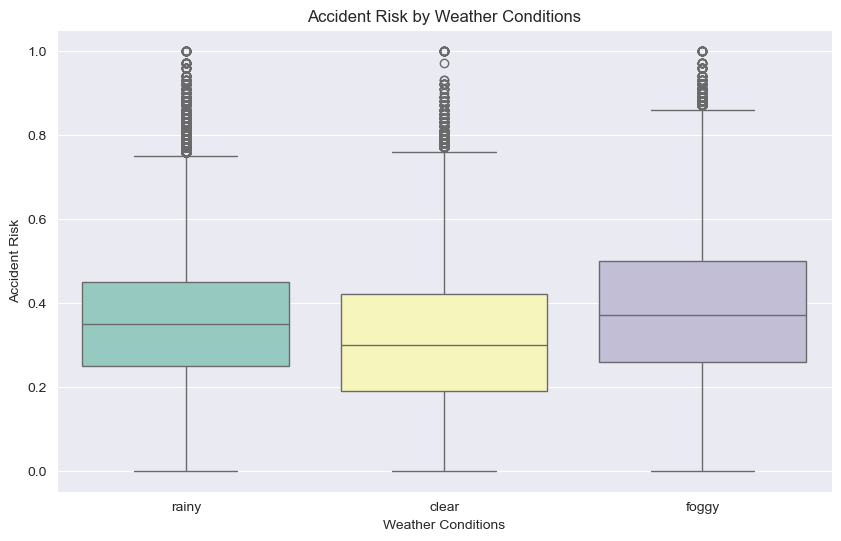

In [14]:
df_plot = data[['weather', 'accident_risk']].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='accident_risk', data=df_plot, palette="Set3")
plt.title('Accident Risk by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Accident Risk')
plt.show()

In [15]:
print(cat_cols)

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')


# Road type vs. Accident Risks

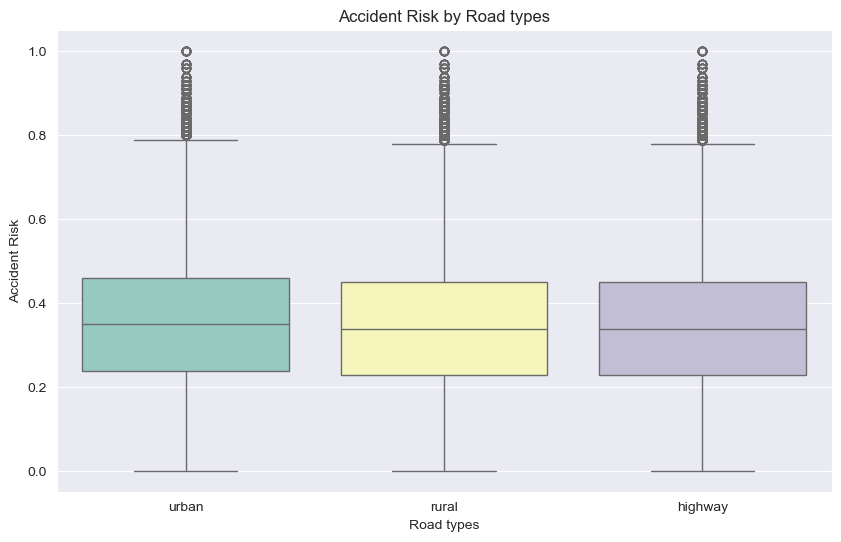

In [16]:
df_plot = data[['road_type', 'accident_risk']].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='road_type', y='accident_risk', data=df_plot, palette="Set3")
plt.title('Accident Risk by Road types')
plt.xlabel('Road types')
plt.ylabel('Accident Risk')
plt.show()

# Time of the day vs. Accident Risk

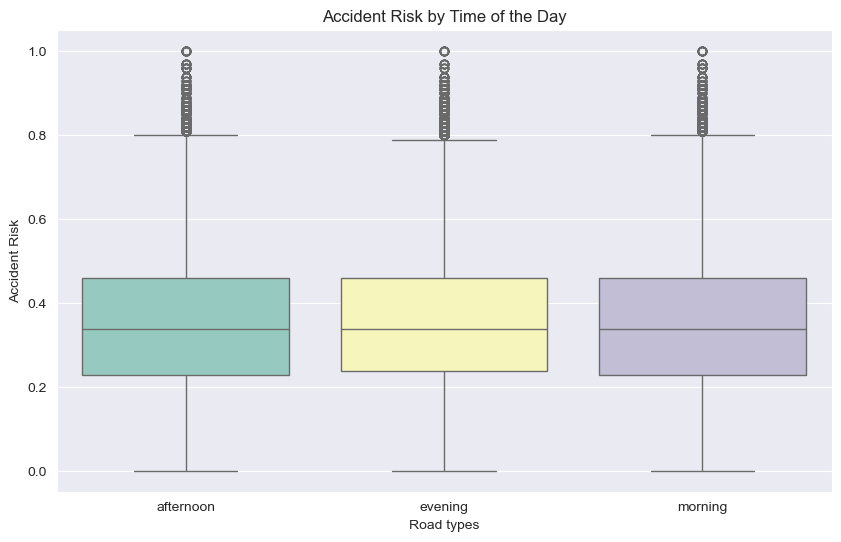

In [17]:
df_plot = data[['time_of_day', 'accident_risk']].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='accident_risk', data=df_plot, palette="Set3")
plt.title('Accident Risk by Time of the Day')
plt.xlabel('Road types')
plt.ylabel('Accident Risk')
plt.show()

# Speed Limits vs. Accident Risk

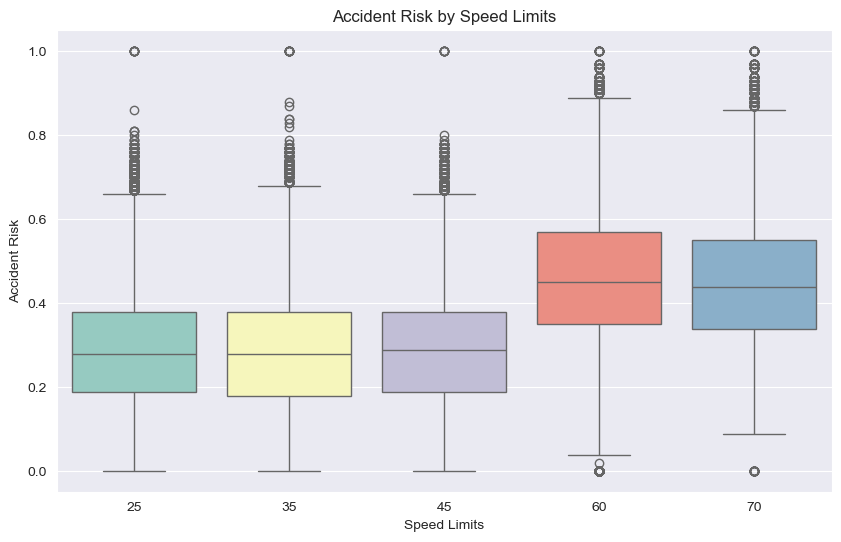

In [21]:
df_plot = data[['speed_limit', 'accident_risk']].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='speed_limit', y='accident_risk', data=df_plot, palette="Set3")
plt.title('Accident Risk by Speed Limits')
plt.xlabel('Speed Limits')
plt.ylabel('Accident Risk')
plt.show()

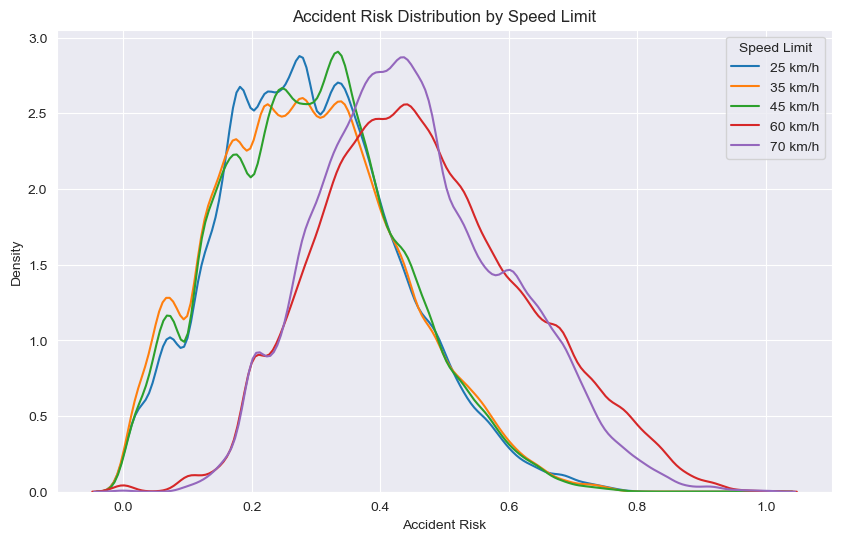

In [22]:
plt.figure(figsize=(10, 6))
for limit in sorted(data['speed_limit'].unique()):
    subset = data[data['speed_limit'] == limit]
    sns.kdeplot(subset['accident_risk'], label=f"{limit} km/h")

plt.title('Accident Risk Distribution by Speed Limit')
plt.xlabel('Accident Risk')
plt.ylabel('Density')
plt.legend(title="Speed Limit")
plt.show()

In [23]:
print(num_cols)

Index(['id', 'num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')


# Curvature vs. Accident Risk

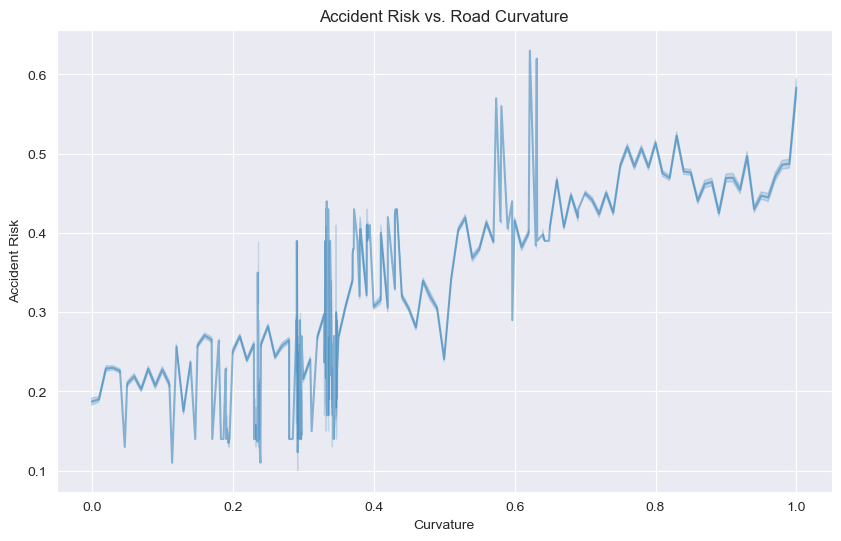

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='curvature', y='accident_risk', data=data, alpha=0.5)
plt.title('Accident Risk vs. Road Curvature')
plt.xlabel('Curvature')
plt.ylabel('Accident Risk')
plt.show()

# Num Reported accidents vs. Accident Risk

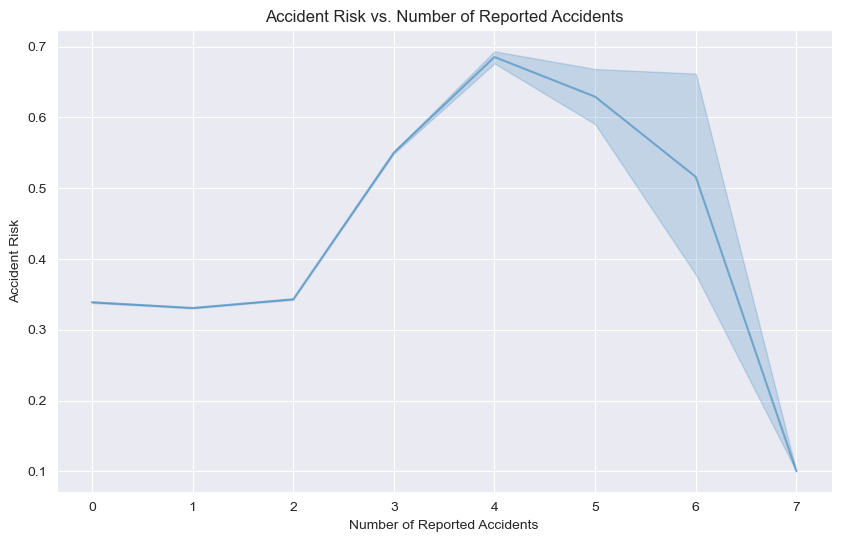

In [29]:
df_plot = data[['num_reported_accidents', 'accident_risk']].copy()
plt.figure(figsize=(10, 6))
sns.lineplot(df_plot, x='num_reported_accidents', y='accident_risk', alpha=0.5)
plt.title('Accident Risk vs. Number of Reported Accidents')
plt.xlabel('Number of Reported Accidents')
plt.ylabel('Accident Risk')
plt.show()


# Lighting X Weather Condition affect on Accident Risk

In [31]:
cols = ['Lighting', 'Weather']

for col in cols:
    print(f"{col} unique values: {data[col.lower()].unique()}")

Lighting unique values: ['daylight' 'dim' 'night']
Weather unique values: ['rainy' 'clear' 'foggy']


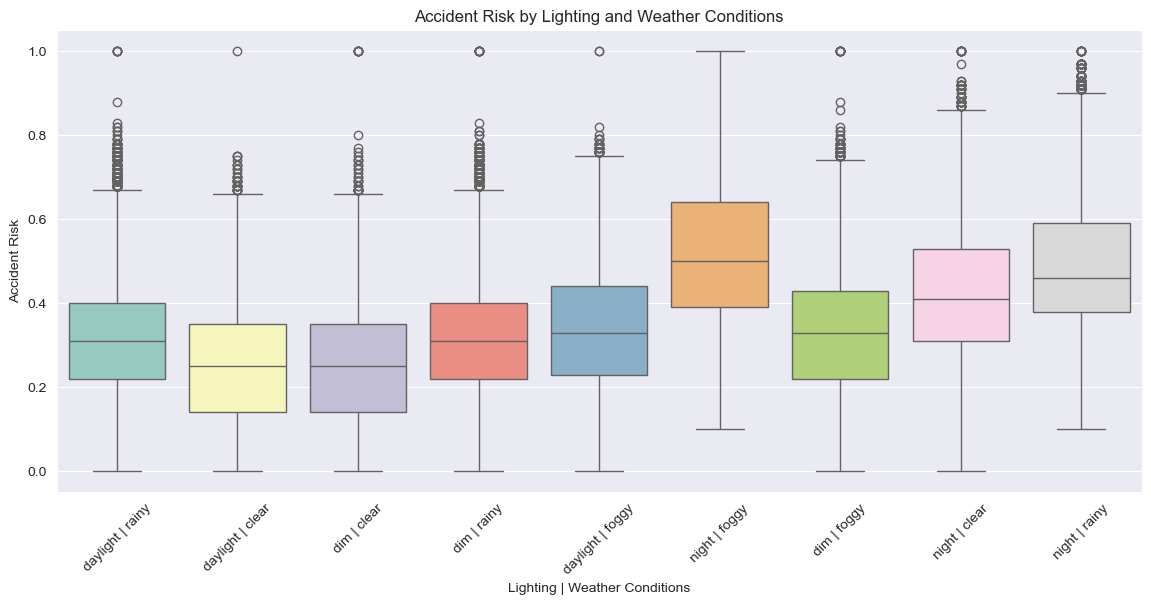

In [30]:
df_plot = data[['lighting', 'weather', 'accident_risk']].copy()
df_plot['lighting_weather'] = df_plot['lighting'] + ' | ' + df_plot['weather']
plt.figure(figsize=(14, 6))
sns.boxplot(x='lighting_weather', y='accident_risk', data=df_plot, palette="Set3")
plt.title('Accident Risk by Lighting and Weather Conditions')
plt.xlabel('Lighting | Weather Conditions')
plt.ylabel('Accident Risk')
plt.xticks(rotation=45)
plt.show()

# Pair plot for numerical features

<Figure size 1400x600 with 0 Axes>

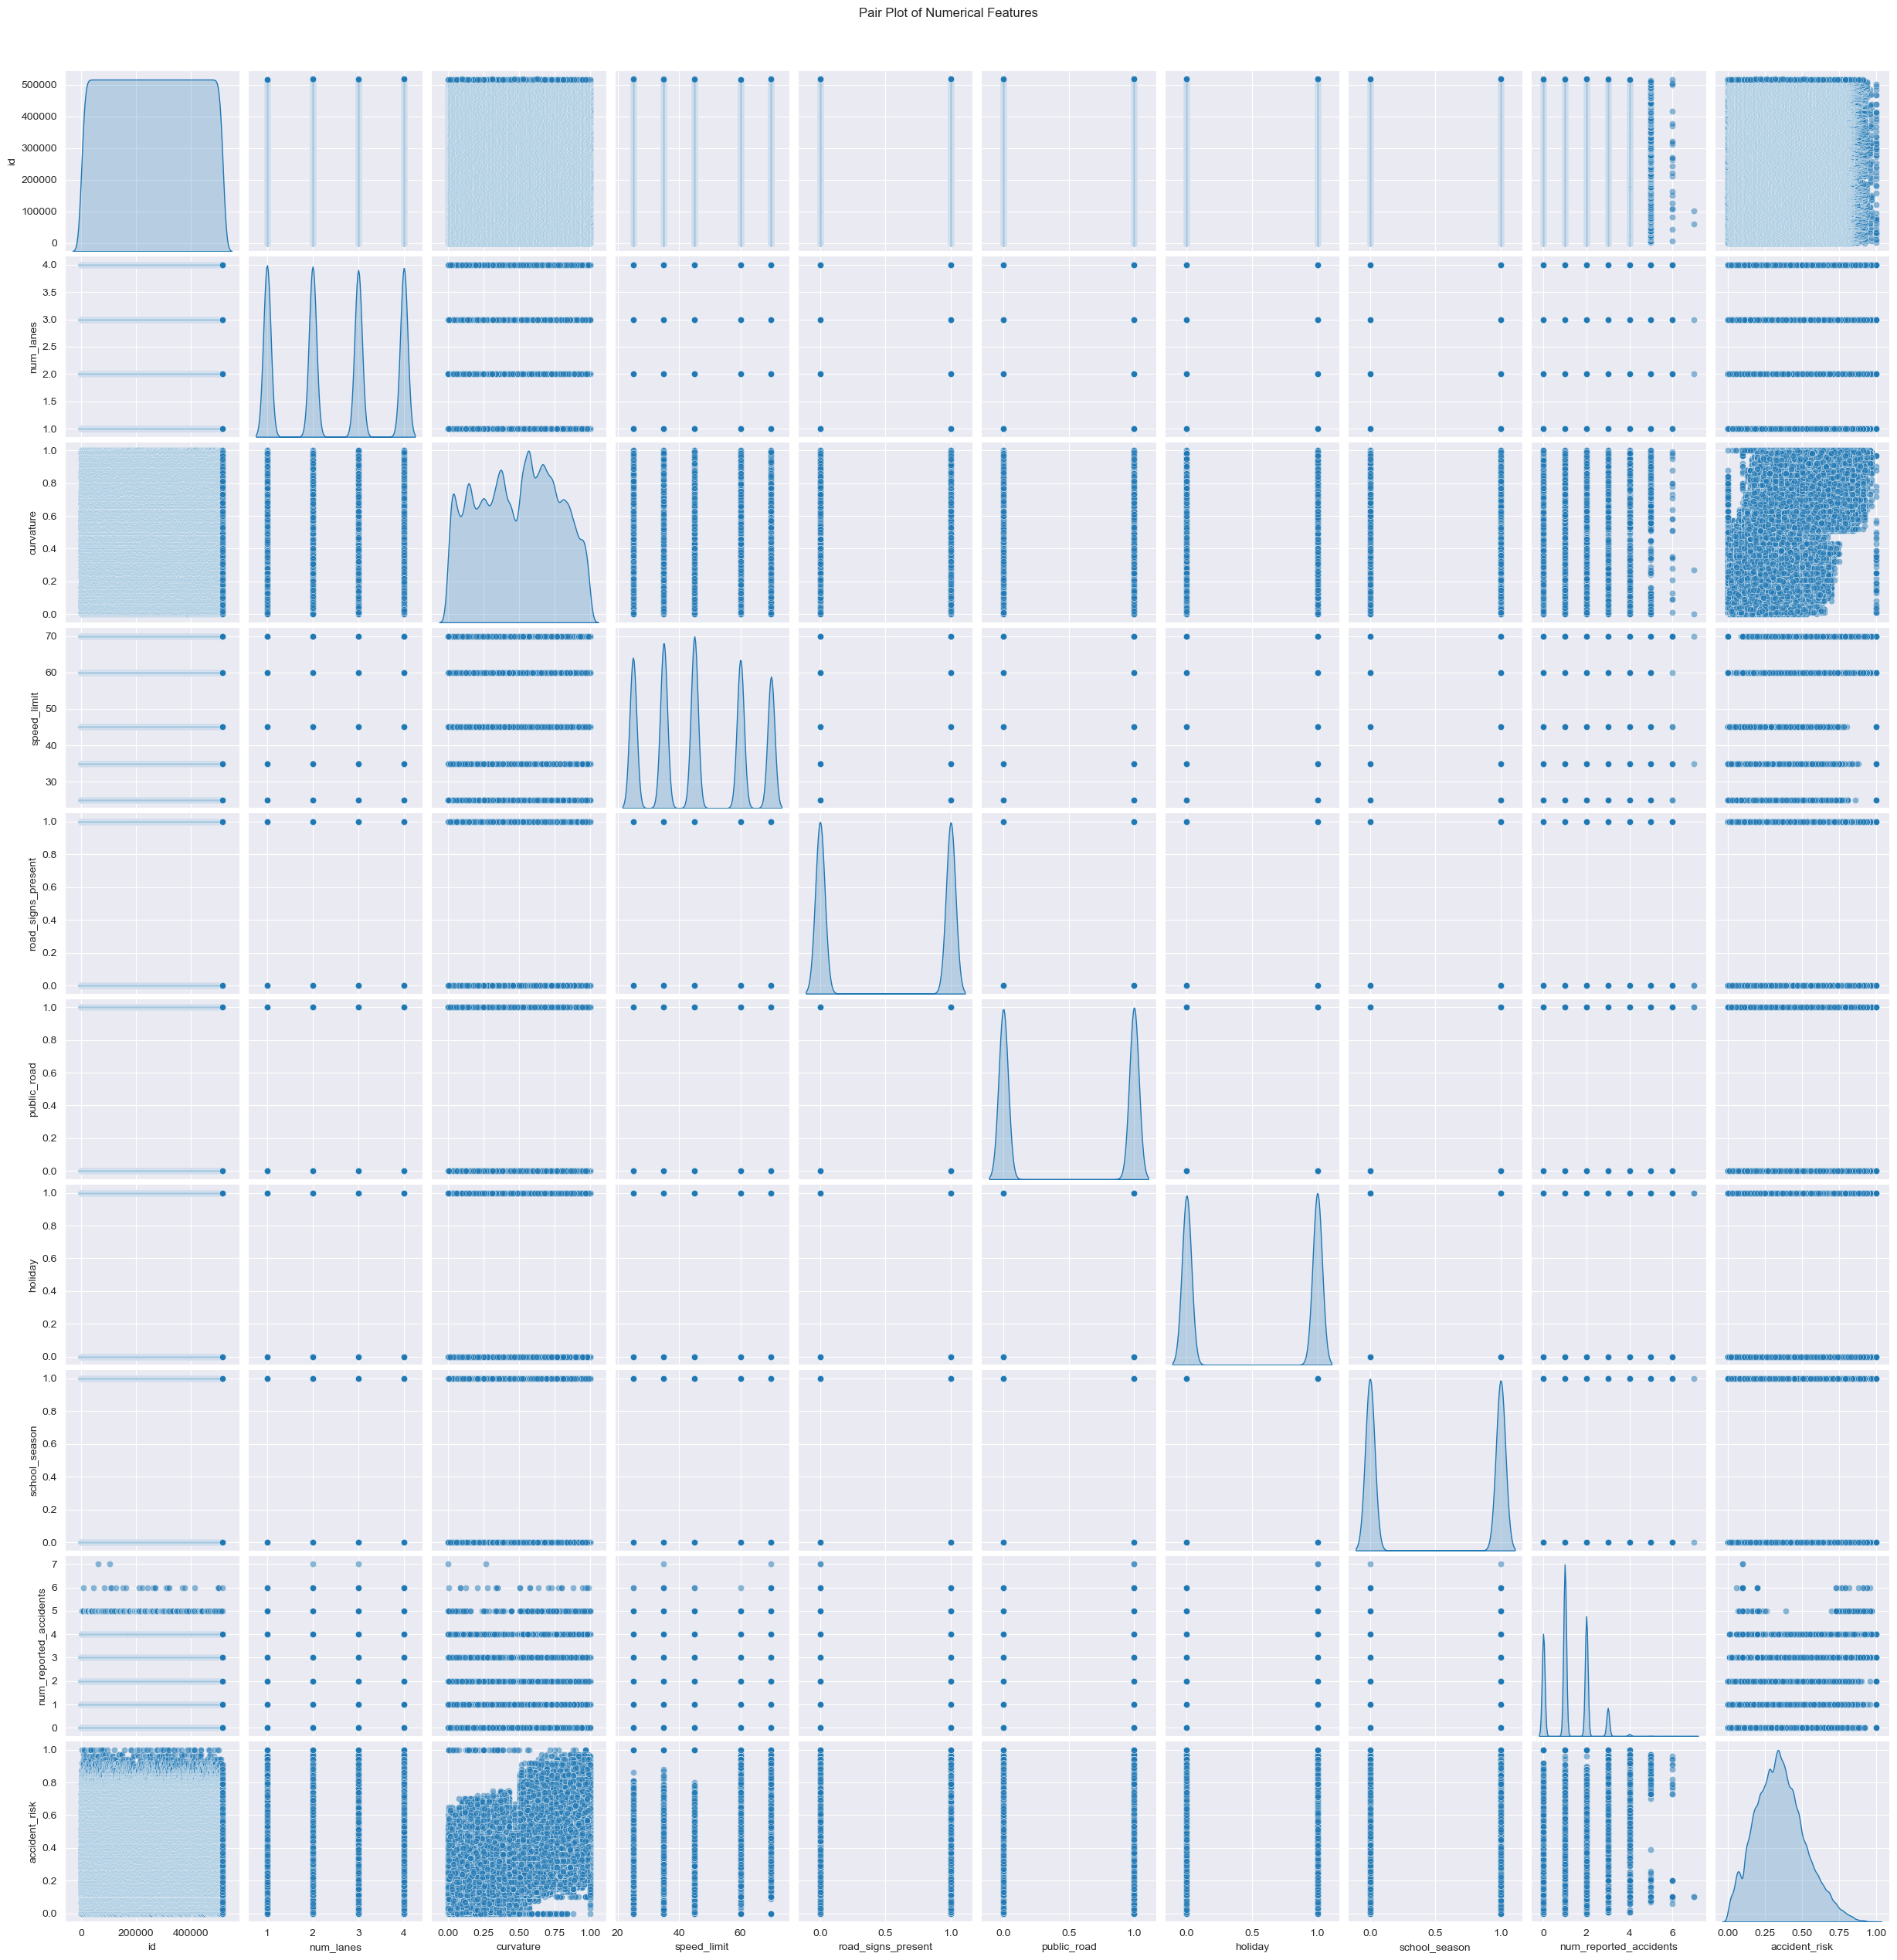

In [34]:
plt.figure(figsize=(14, 6))
sns.pairplot(data[num_cols], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()